# FIFA stats data analyses

Loading packages

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

#### Data preparation

Loading raw data

In [5]:
rawdata = pd.read_csv('data.csv', sep=',')
rawdata

Unnamed: 0      ID                Name  Age  \
0               0  158023            L. Messi   31   
1               1   20801   Cristiano Ronaldo   33   
2               2  190871           Neymar Jr   26   
3               3  193080              De Gea   27   
4               4  192985        K. De Bruyne   27   
...           ...     ...                 ...  ...   
18202       18202  238813        J. Lundstram   19   
18203       18203  243165  N. Christoffersson   19   
18204       18204  241638           B. Worman   16   
18205       18205  246268      D. Walker-Rice   17   
18206       18206  246269           G. Nugent   16   

                                                Photo Nationality  \
0      https://cdn.sofifa.org/players/4/19/158023.png   Argentina   
1       https://cdn.sofifa.org/players/4/19/20801.png    Portugal   
2      https://cdn.sofifa.org/players/4/19/190871.png      Brazil   
3      https://cdn.sofifa.org/players/4/19/193080.png       Spain   
4      https://cdn.sofifa.org/players/4/19/192985.png     Belgium   
...                                               ...         ...   
18202  https://cdn.sofifa.org/players/4/19/238813.png     England   
18203  https://cdn.sofifa.org/players/4/19/243165.png      Sweden   
18204  https://cdn.sofifa.org/players/4/19/241638.png     England   
18205  https://cdn.sofifa.org/players/4/19/246268.png     England   
18206  https://cdn.sofifa.org/players/4/19/246269.png     England   

                                      Flag  Overall  Potential  \
0      https://cdn.sofifa.org/flags/52.png       94         94   
1      https://cdn.sofifa.org/flags/38.png       94         94   
2      https://cdn.sofifa.org/flags/54.png       92         93   
3      https://cdn.sofifa.org/flags/45.png       91         93   
4       https://cdn.sofifa.org/flags/7.png       91         92   
...                                    ...      ...        ...   
18202  https://cdn.sofifa.org/flags/14.png       47         65   
18203  https://cdn.sofifa.org/flags/46.png       47         63   
18204  https://cdn.sofifa.org/flags/14.png       47         67   
18205  https://cdn.sofifa.org/flags/14.png       47         66   
18206  https://cdn.sofifa.org/flags/14.png       46         66   

                      Club  ... Composure Marking StandingTackle  \
0             FC Barcelona  ...      96.0    33.0           28.0   
1                 Juventus  ...      95.0    28.0           31.0   
2      Paris Saint-Germain  ...      94.0    27.0           24.0   
3        Manchester United  ...      68.0    15.0           21.0   
4          Manchester City  ...      88.0    68.0           58.0   
...                    ...  ...       ...     ...            ...   
18202      Crewe Alexandra  ...      45.0    40.0           48.0   
18203       Trelleborgs FF  ...      42.0    22.0           15.0   
18204     Cambridge United  ...      41.0    32.0           13.0   
18205      Tranmere Rovers  ...      46.0    20.0           25.0   
18206      Tranmere Rovers  ...      43.0    40.0           43.0   

       SlidingTackle GKDiving  GKHandling  GKKicking  GKPositioning  \
0               26.0      6.0        11.0       15.0           14.0   
1               23.0      7.0        11.0       15.0           14.0   
2               33.0      9.0         9.0       15.0           15.0   
3               13.0     90.0        85.0       87.0           88.0   
4               51.0     15.0        13.0        5.0           10.0   
...              ...      ...         ...        ...            ...   
18202           47.0     10.0        13.0        7.0            8.0   
18203           19.0     10.0         9.0        9.0            5.0   
18204           11.0      6.0         5.0       10.0            6.0   
18205           27.0     14.0         6.0       14.0            8.0   
18206           50.0     10.0        15.0        9.0           12.0   

      GKReflexes Release Clause  
0            8.0        €226.5M 

Show columns

In [6]:
rawdata.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

Drop useless columns

In [7]:
rawdata = rawdata.drop(['Unnamed: 0', 'ID', 'Photo', 'Flag', 'Club Logo', 'Special', 'Body Type', 'Real Face', 'Joined', 'Loaned From', 'Contract Valid Until', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Release Clause', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes'], 1)

In [8]:
# Count by 'Position' attribute:
rawdata['Position'].value_counts()

ST     2152
GK     2025
CB     1778
CM     1394
LB     1322
RB     1291
RM     1124
LM     1095
CAM     958
CDM     948
RCB     662
LCB     648
LCM     395
RCM     391
LW      381
RW      370
RDM     248
LDM     243
LS      207
RS      203
RWB      87
LWB      78
CF       74
RAM      21
LAM      21
RF       16
LF       15
Name: Position, dtype: int64

In [9]:
# Delete goalkeepers
data = rawdata[rawdata.Position != 'GK']

In [10]:
# Add less specified position column - 'Formation':

ATT = ['ST', 'LF', 'RF', 'LS', 'RS']
DEF = ['CB', 'LB', 'RB','RCB', 'LCB', 'RWB', 'LWB']

pd.options.mode.chained_assignment = None
data.insert(5, 'Formation', 'MID')
data.loc[data.Position.isin(ATT), 'Formation'] = 'ATT'
data.loc[data.Position.isin(DEF), 'Formation'] = 'DEF'

In [11]:
data['Formation'].value_counts()

MID    7723
DEF    5866
ATT    2593
Name: Formation, dtype: int64

Handling NULL data

In [12]:
# NULL DATA?
data.isnull().any().any()

True

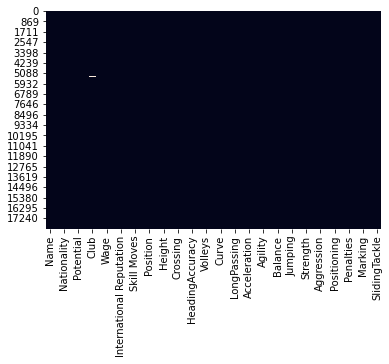

In [13]:
# NULL DATA VISUALISATION 1:
sns.heatmap(data.isnull(),cbar=False)
plt.show()

In [14]:
# DROP NA's
data = data.dropna()

In [15]:
# NULL DATA?
data.isnull().any().any()

False

(15926, 47)


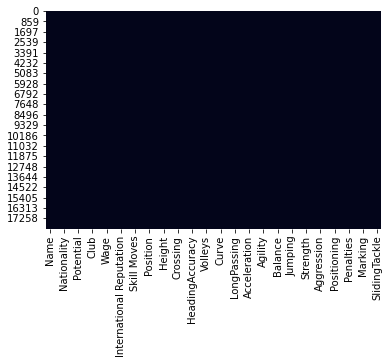

In [16]:
# NULL DATA VISUALISATION 2:
print(data.shape)
sns.heatmap(data.isnull(),cbar=False)

plt.show()

In [17]:
# RESET INDEXES
data.reset_index(drop=True, inplace=True)

In [18]:
# TYPES OF DATA:
data.dtypes

Name                         object
Age                           int64
Nationality                  object
Overall                       int64
Potential                     int64
Formation                    object
Club                         object
Value                        object
Wage                         object
Preferred Foot               object
International Reputation    float64
Weak Foot                   float64
Skill Moves                 float64
Work Rate                    object
Position                     object
Jersey Number               float64
Height                       object
Weight                       object
Crossing                    float64
Finishing                   float64
HeadingAccuracy             float64
ShortPassing                float64
Volleys                     float64
Dribbling                   float64
Curve                       float64
FKAccuracy                  float64
LongPassing                 float64
BallControl                 

In [19]:
data.head(10)

Name  Age Nationality  Overall  Potential Formation  \
0           L. Messi   31   Argentina       94         94       ATT   
1  Cristiano Ronaldo   33    Portugal       94         94       ATT   
2          Neymar Jr   26      Brazil       92         93       MID   
3       K. De Bruyne   27     Belgium       91         92       MID   
4          E. Hazard   27     Belgium       91         91       ATT   
5          L. Modrić   32     Croatia       91         91       MID   
6          L. Suárez   31     Uruguay       91         91       ATT   
7       Sergio Ramos   32       Spain       91         91       DEF   
8     R. Lewandowski   29      Poland       90         90       ATT   
9           T. Kroos   28     Germany       90         90       MID   

                  Club    Value   Wage Preferred Foot  ...  LongShots  \
0         FC Barcelona  €110.5M  €565K           Left  ...       94.0   
1             Juventus     €77M  €405K          Right  ...       93.0   
2  Paris Saint-Germain  €118.5M  €290K          Right  ...       82.0   
3      Manchester City    €102M  €355K          Right  ...       91.0   
4              Chelsea     €93M  €340K          Right  ...       80.0   
5          Real Madrid     €67M  €420K          Right  ...       82.0   
6         FC Barcelona     €80M  €455K          Right  ...       85.0   
7          Real Madrid     €51M  €380K          Right  ...       59.0   
8    FC Bayern München     €77M  €205K          Right  ...       84.0   
9          Real Madrid   €76.5M  €355K          Right  ...       92.0   

   Aggression  Interceptions Positioning Vision  Penalties Composure Marking  \
0        48.0           22.0        94.0   94.0       75.0      96.0    33.0   
1        63.0           29.0        95.0   82.0       85.0      95.0    28.0   
2        56.0           36.0        89.0   87.0       81.0      94.0    27.0   
3        76.0           61.0        87.0   94.0       79.0      88.0    68.0   
4        54.0           41.0        87.0   89.0       86.0      91.0    34.0   
5        62.0           83.0        79.0   92.0       82.0      84.0    60.0   
6        87.0           41.0        92.0   84.0       85.0      85.0    62.0   
7        88.0           90.0        60.0   63.0       75.0      82.0    87.0   
8        80.0           39.0        91.0   77.0       88.0      86.0    34.0   
9        60.0           82.0        79.0   86.0       73.0      85.0    72.0   

   StandingTackle  SlidingTackle  
0            28.0           26.0  
1            31.0           23.0  
2            24.0           33.0  
3            58.0           51.0  
4            27.0           22.0  
5            76.0           73.0  
6            45.0           38.0  
7            92.0           91.0  
8            42.0           19.0  
9            79.0           69.0  

[10 rows x 47 columns]

In [19]:
# SAVE CSV
data.to_csv('FIFA.csv', index = False)

In [18]:
# CREATE DATA FRAME WITH FLOAT VALUES ONLY
stats_only = data.loc[:, 'Crossing':'StandingTackle']

In [19]:
# Data description:
pd.set_option('precision', 2)
stats_only.describe()

Crossing  Finishing  HeadingAccuracy  ShortPassing   Volleys  \
count  15926.00   15926.00         15926.00      15926.00  15926.00   
mean      54.19      49.78            57.04         62.65     46.75   
std       14.13      16.36            11.61          9.78     14.77   
min       11.00      10.00            15.00         20.00     10.00   
25%       44.00      36.00            49.00         57.00     35.00   
50%       56.00      52.00            58.00         64.00     47.00   
75%       65.00      63.00            65.00         69.00     58.00   
max       93.00      95.00            94.00         93.00     90.00   

       Dribbling     Curve  FKAccuracy  LongPassing  BallControl  ...  \
count   15926.00  15926.00    15926.00     15926.00     15926.00  ...   
mean       60.61     51.28       46.44        56.09        63.22  ...   
std        12.51     15.14       15.08        12.38        10.00  ...   
min        14.00     11.00       10.00        19.00        25.00  ...   
25%        55.00     39.00       34.00        49.00        58.00  ...   
50%        63.00     52.00       44.00        58.00        64.00  ...   
75%        69.00     63.00       58.00        65.00        70.00  ...   
max        97.00     94.00       94.00        93.00        96.00  ...   

       Strength  LongShots  Aggression  Interceptions  Positioning    Vision  \
count  15926.00   15926.00    15926.00        15926.0     15926.00  15926.00   
mean      65.91      51.45       59.58           50.4        54.84     55.49   
std       12.60      15.72       14.43           18.8        14.67     12.90   
min       25.00      11.00       13.00           10.0        11.00     12.00   
25%       59.00      40.00       50.00           34.0        46.00     47.00   
50%       67.00      54.00       61.00           56.0        57.00     57.00   
75%       75.00      64.00       70.00           65.0        65.00     65.00   
max       97.00      94.00       95.00           92.0        95.00     94.00   

       Penalties  Composure   Marking  StandingTackle  
count   15926.00   15926.00  15926.00        15926.00  
mean       52.12      60.35     51.27           51.88  
std        12.50      10.14     17.20           19.16  
min        12.00      29.00     10.00           10.00  
25%        42.00      53.00     37.00           35.00  
50%        52.00      61.00     56.00           59.00  
75%        61.00      68.00     65.00           67.00  
max        92.00      96.00     94.00           93.00  

[8 rows x 28 columns]

In [20]:
# Grouping by nationalities
nationalities = data['Nationality'].value_counts()
nationalities[:25]

England                1483
Germany                1031
Spain                   955
Argentina               838
France                  810
Brazil                  757
Italy                   607
Colombia                564
Japan                   417
Netherlands             396
Sweden                  348
Chile                   346
China PR                337
Republic of Ireland     329
Mexico                  319
Norway                  310
Denmark                 300
Korea Republic          293
Saudi Arabia            290
Portugal                289
Poland                  288
United States           281
Scotland                262
Turkey                  256
Austria                 252
Name: Nationality, dtype: int64

In [21]:
# Loc function
# Count number of rows with age less than 30
data.loc[data['Age'] < 30].Age.count()

13028

In [22]:
# Iloc function
stats_only.iloc[2:10, 0:5]

Crossing  Finishing  HeadingAccuracy  ShortPassing  Volleys
2      79.0       87.0             62.0          84.0     84.0
3      93.0       82.0             55.0          92.0     82.0
4      81.0       84.0             61.0          89.0     80.0
5      86.0       72.0             55.0          93.0     76.0
6      77.0       93.0             77.0          82.0     88.0
7      66.0       60.0             91.0          78.0     66.0
8      62.0       91.0             85.0          83.0     89.0
9      88.0       76.0             54.0          92.0     82.0

### Aggregate stats


Mean by position

In [57]:
data.groupby(['Position']).mean().sort_values('Finishing', ascending=False)

Age  Overall  Potential  International Reputation  Weak Foot  \
Position                                                                   
RF        27.62    73.25      75.44                      1.56       3.44   
LS        26.78    70.08      72.83                      1.22       3.25   
RS        26.66    69.54      72.44                      1.21       3.21   
LF        26.73    73.87      76.60                      1.67       3.60   
ST        24.65    65.51      71.12                      1.12       3.07   
CF        23.51    65.82      72.74                      1.19       3.24   
LAM       29.33    71.86      72.52                      1.24       3.29   
RAM       28.71    72.29      72.86                      1.19       3.38   
RW        23.52    66.84      73.31                      1.15       3.17   
LW        23.39    66.64      73.17                      1.11       3.17   
CAM       24.56    66.88      72.63                      1.14       3.22   
LM        24.48    66.68      71.75                      1.10       3.17   
RM        24.41    66.47      71.53                      1.10       3.11   
LCM       26.10    69.33      72.81                      1.19       3.14   
RCM       26.19    69.11      72.53                      1.18       3.18   
RDM       26.99    69.74      72.47                      1.11       3.07   
LDM       26.85    69.10      72.35                      1.13       3.02   
CM        23.47    63.70      70.90                      1.09       3.04   
CDM       25.21    66.31      71.53                      1.12       2.97   
LWB       25.38    66.51      70.68                      1.09       2.77   
RWB       24.37    64.66      69.95                      1.10       2.94   
LB        25.08    65.85      70.53                      1.08       2.79   
RB        25.26    66.03      70.48                      1.09       2.92   
RCB       26.98    69.32      72.25                      1.16       2.82   
LCB       27.01    69.20      72.30                      1.15       2.80   
CB        24.81    64.99      70.89                      1.08       2.78   

          Skill Moves  Jersey Number  Crossing  Finishing  HeadingAccuracy  \
Position                                                                     
RF               3.31          13.88     68.50      70.44            54.75   
LS               2.82          18.83     53.44      69.87            64.32   
RS               2.80          17.83     52.11      69.68            64.59   
LF               3.40          16.80     67.53      69.33            54.47   
ST               2.55          22.65     46.15      66.39            63.29   
CF               2.93          22.27     54.80      64.61            54.04   
LAM              3.33          10.38     69.29      63.71            54.76   
RAM              3.29          14.00     68.43      63.10            50.19   
RW               3.01          22.91     61.94      62.24            49.11   
LW               3.05          22.53     61.38      61.90            49.41   
CAM              2.97          20.69     59.67      59.39            48.98   
LM               2.92          21.27     62.70      59.38            48.94   
RM               2.90          20.25     62.43      59.09            49.26   
LCM              2.79          15.87     60.42      55.83            54.75   
RCM              2.77          16.22     60.31      55.47            55.31   
RDM              2.57          16.14     56.57      51.16            59.13   
LDM              2.60          17.05     57.29      50.64            57.87   
CM               2.53          21.81     54.65      49.89            51.72   
CDM              2.32          20.00     52.12      44.40            57.19   
LWB              2.51          14.56     64.46      42.58            54.13   
RWB              2.38          20.36     61.59      41.83            52.10   
LB               2.42          18.53     63.41      39.97            55.59   
RB         

Count by formation and position

In [72]:
data['count'] = 1
data.groupby(['Formation', 'Position'], sort = True).count()['count']

Formation   Position
Attacker    LF            15
            LS           206
            RF            16
            RS           201
            ST          2130
Defender    CB          1754
            LB          1305
            LCB          637
            LWB           78
            RB          1268
            RCB          652
            RWB           87
Midfielder  CAM          948
            CDM          936
            CF            74
            CM          1377
            LAM           21
            LCM          389
            LDM          239
            LM          1086
            LW           374
            RAM           21
            RCM          387
            RDM          246
            RM          1114
            RW           365
Name: count, dtype: int64

### Correlation

In [23]:
# Data frame with chosen physical abilities
physical_only = stats_only[['Balance', 'Jumping', 'Agility', 'Strength', 'Stamina']]
physical_only

Balance  Jumping  Agility  Strength  Stamina
0         95.0     68.0     91.0      59.0     72.0
1         70.0     95.0     87.0      79.0     88.0
2         84.0     61.0     96.0      49.0     81.0
3         77.0     63.0     79.0      75.0     90.0
4         94.0     56.0     95.0      66.0     83.0
...        ...      ...      ...       ...      ...
15921     76.0     55.0     60.0      47.0     40.0
15922     52.0     47.0     38.0      67.0     43.0
15923     58.0     60.0     50.0      32.0     55.0
15924     71.0     42.0     52.0      48.0     40.0
15925     63.0     62.0     55.0      60.0     47.0

[15926 rows x 5 columns]

          Balance  Jumping  Agility  Strength  Stamina
Balance      1.00     0.05     0.71     -0.60     0.15
Jumping      0.05     1.00     0.07      0.27     0.27
Agility      0.71     0.07     1.00     -0.43     0.28
Strength    -0.60     0.27    -0.43      1.00     0.25
Stamina      0.15     0.27     0.28      0.25     1.00


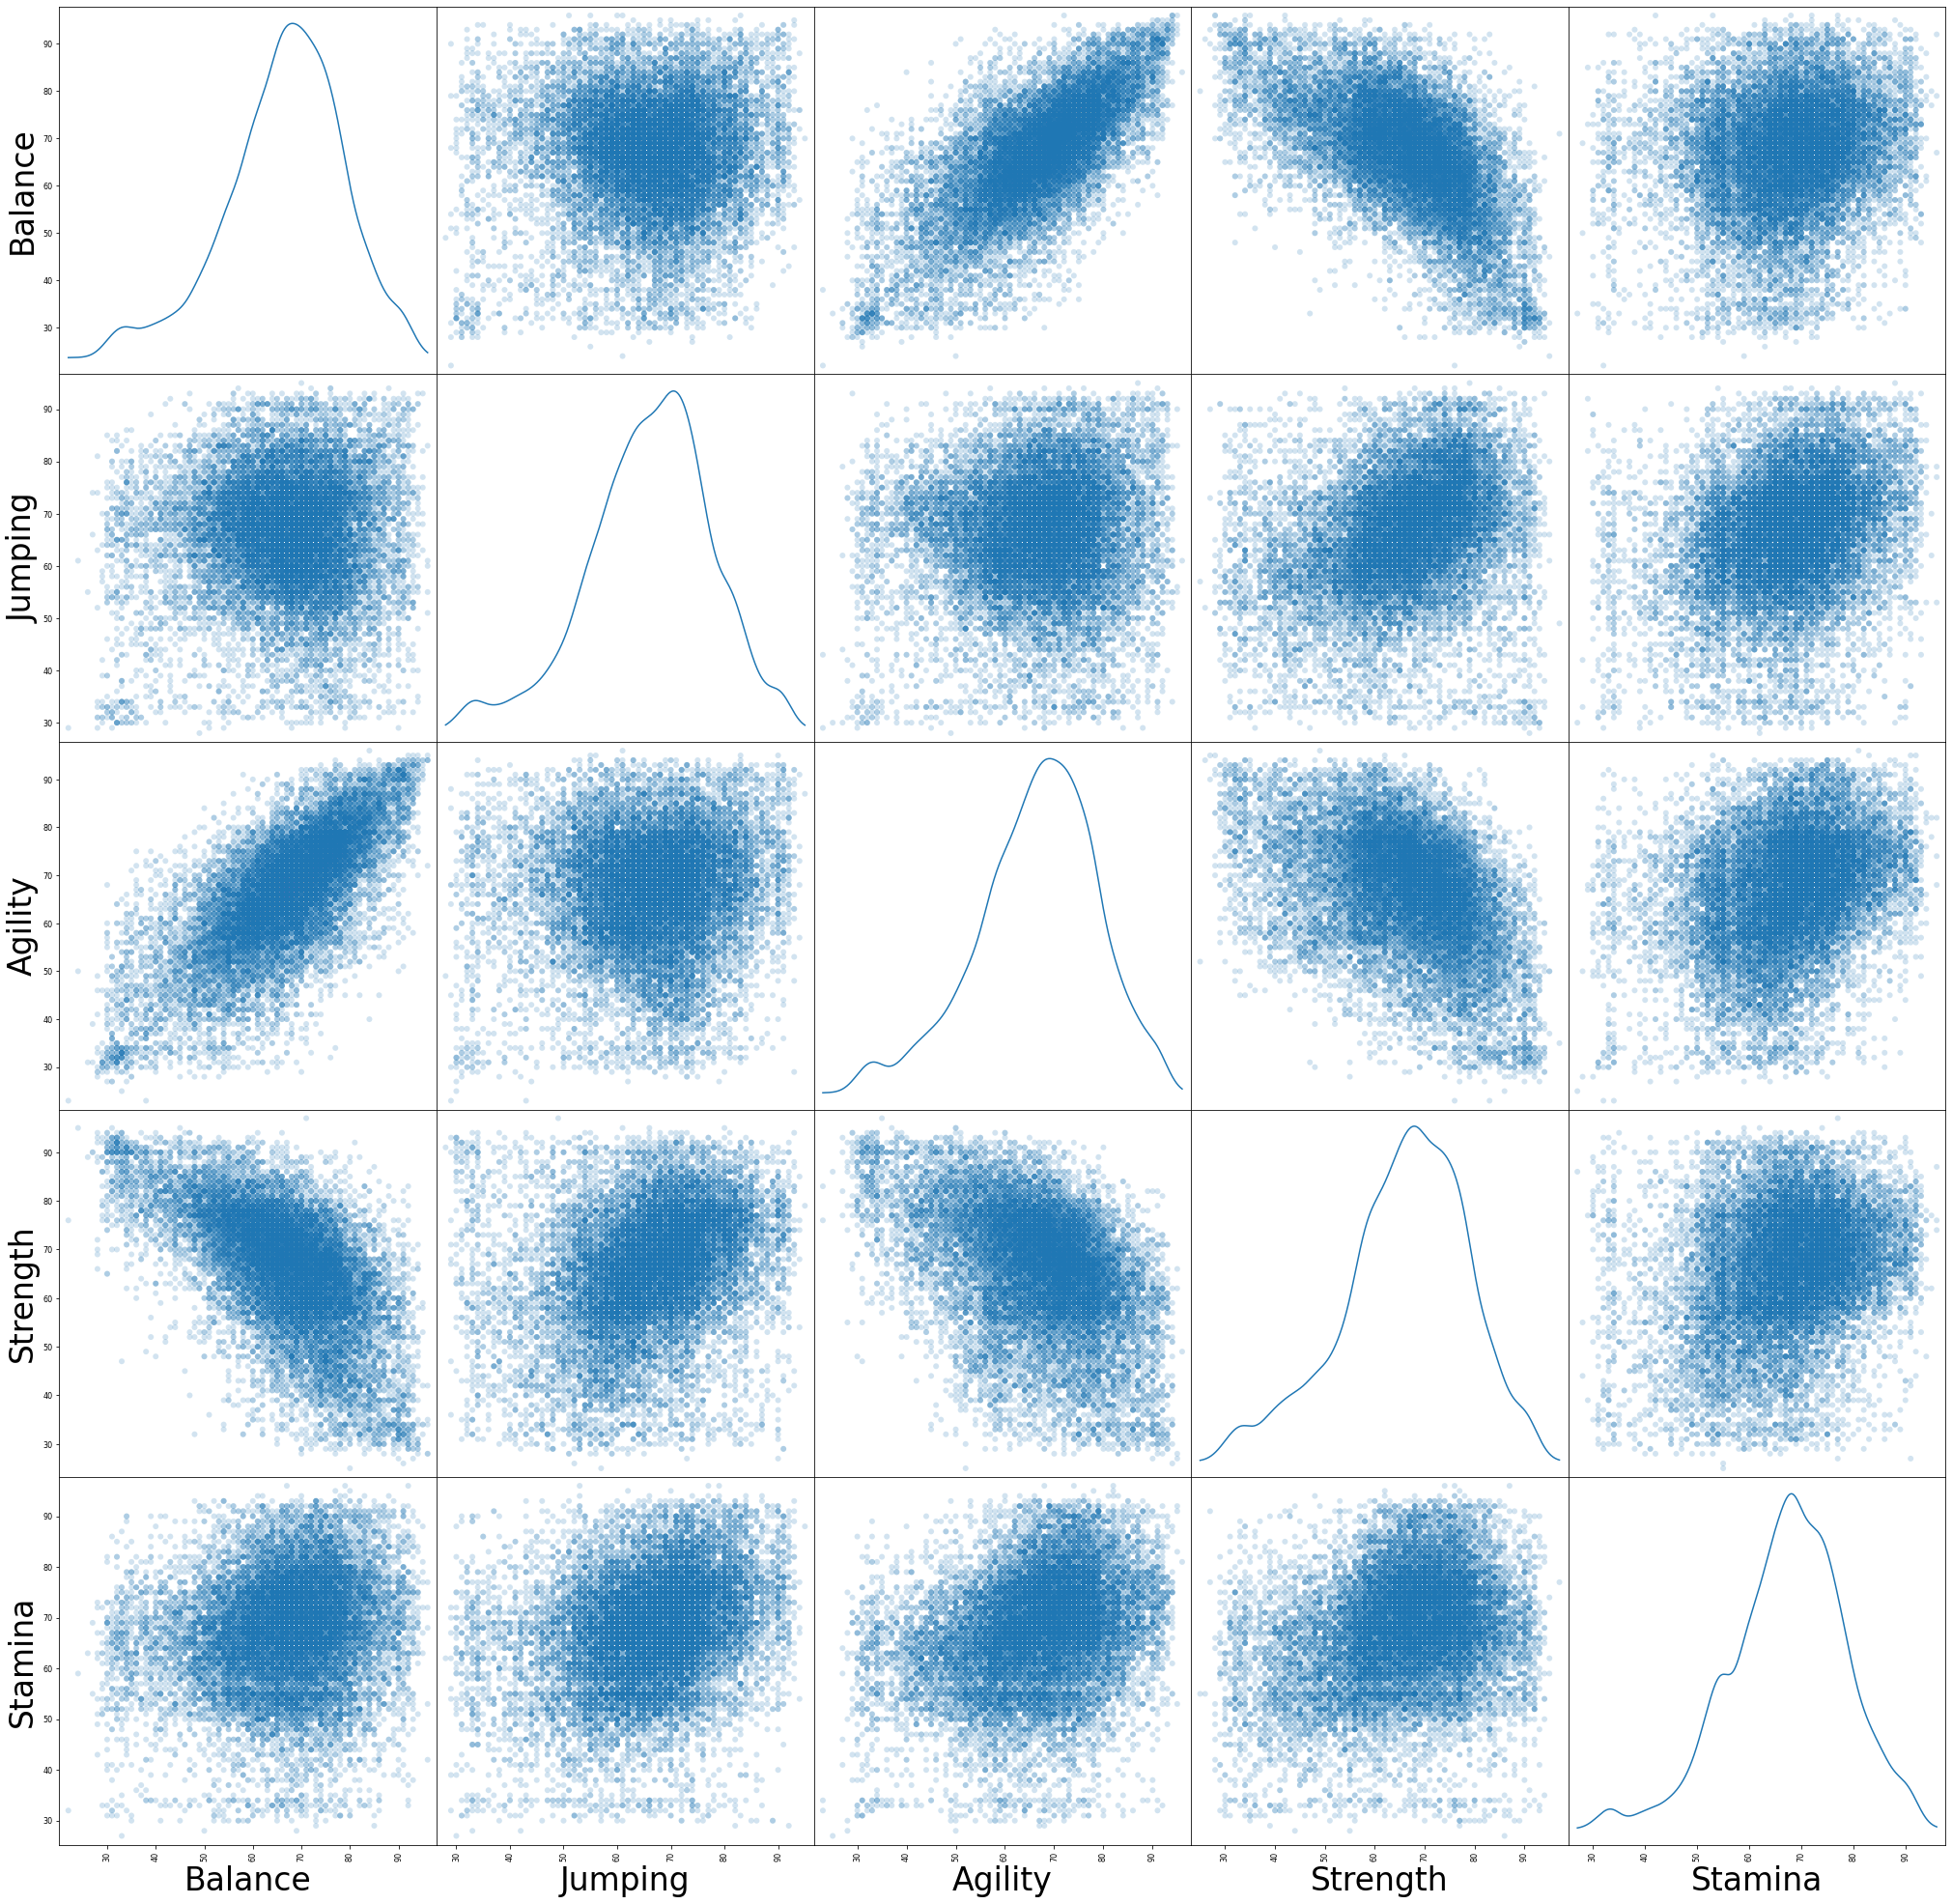

In [24]:
print(physical_only.corr(method='pearson'))

# SCATTER MATRIX FOR CHOSEN PHYSICAL STATS

Axes = pd.plotting.scatter_matrix(physical_only,
                                  figsize = (35,35),
                                  diagonal = 'kde',
                                  marker = 'o',
                                  alpha = 0.2)

[plt.setp(item.xaxis.get_label(), 'size', 33) for item in Axes.ravel()]
[plt.setp(item.yaxis.get_label(), 'size', 33) for item in Axes.ravel()]

plt.show()

In [25]:
# Calculate correlation for all stats
corr = stats_only.corr(method='pearson')

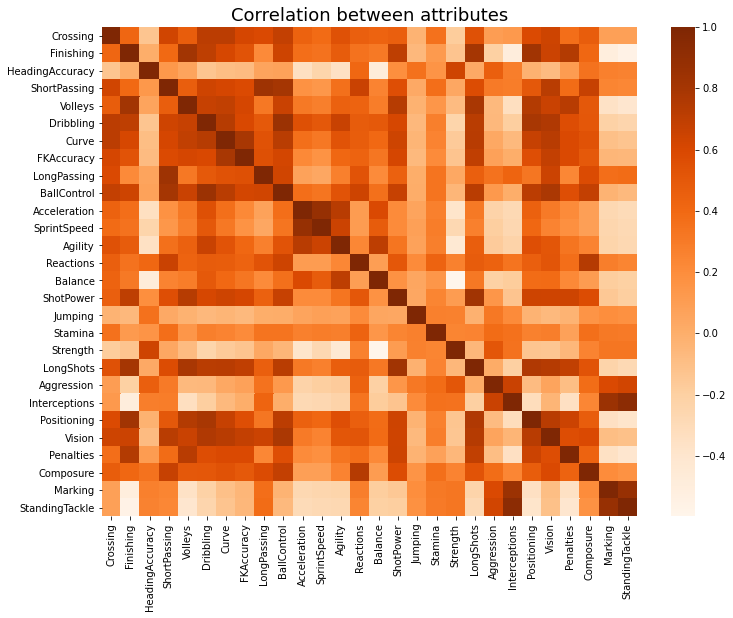

In [26]:
# Correlation plot (heat map)

plt.figure(figsize=(12,9))
plt.title('Correlation between attributes', fontsize=18)
#plt.setp(ax.get_yticklabels(), rotation=45, ha="right", rotation_mode="anchor")
heat_map = sns.heatmap(corr, annot=False, cmap = "Oranges")
heat_map.set_yticklabels(heat_map.get_yticklabels(), rotation = 0)

plt.show()

In [27]:
def draw_scatter(data, x, y, xlabel='x', ylabel='y'):
    ''' Function to plot scatterplot '''
    plt.figure(figsize=(11,11))
    sns.scatterplot(data = data, x = x, y = y, hue = 'Formation', legend='full')
    plt.title('Standing tackle and marking skills correlation', fontsize=22)
    plt.xlabel(xlabel, fontsize = 15)
    plt.ylabel(ylabel, fontsize = 15)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    
    plt.show()

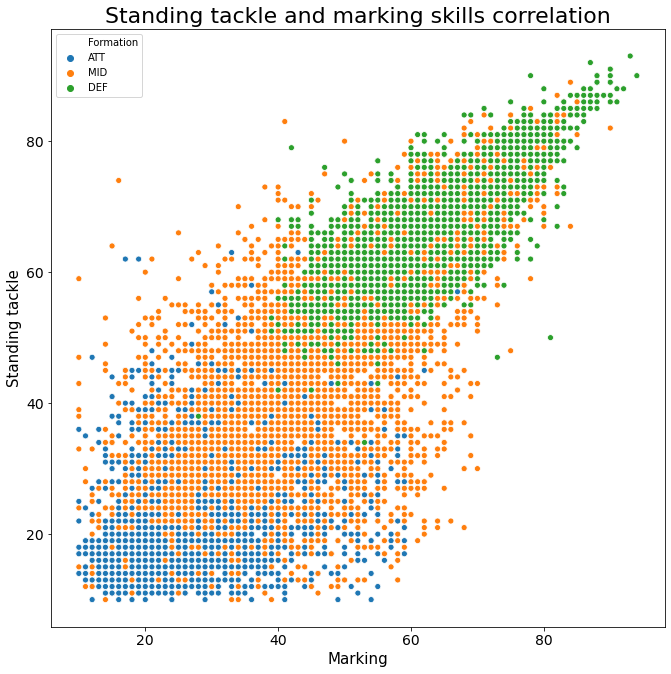

In [28]:
# Scatterplot 1
draw_scatter(data, 'Marking', 'StandingTackle', 'Marking', 'Standing tackle')

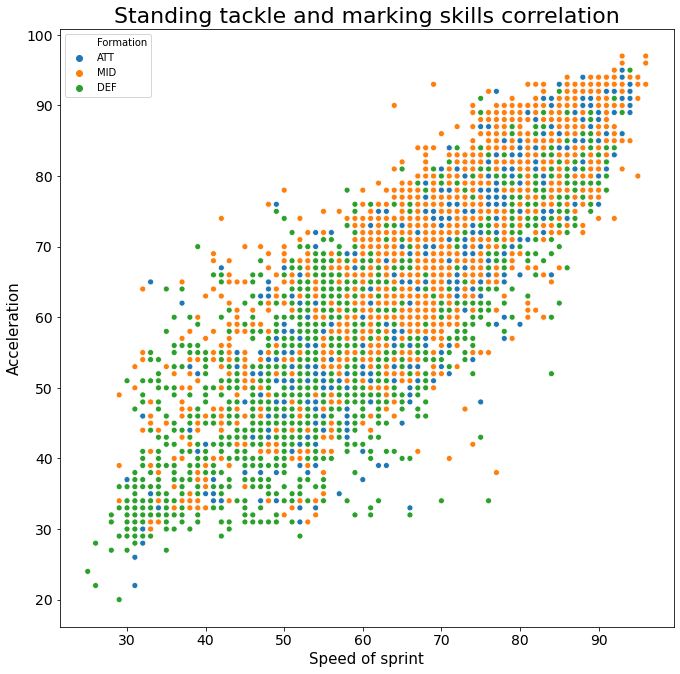

In [29]:
# Scatterplot 2
draw_scatter(data, 'SprintSpeed', 'Acceleration', 'Speed of sprint', 'Acceleration')

In [30]:
def draw_jointplot(data, x, y, height = 18, color = 'red', kind = 'hex'):
    ''' Function to draw jointplot '''
    plt.figure(figsize=(11,11))
    plot = sns.jointplot(data = data, 
                         x = x, 
                         y = y,
                         height = height,
                         color = color,
                         kind = kind)
    ''' kind: scatter, reg, resid, kde, hex '''
    plot.set_axis_labels(x, y, fontsize=40)
    plt.xticks(fontsize=24)
    plt.yticks(fontsize=24)
    
    plt.show()

<Figure size 792x792 with 0 Axes>

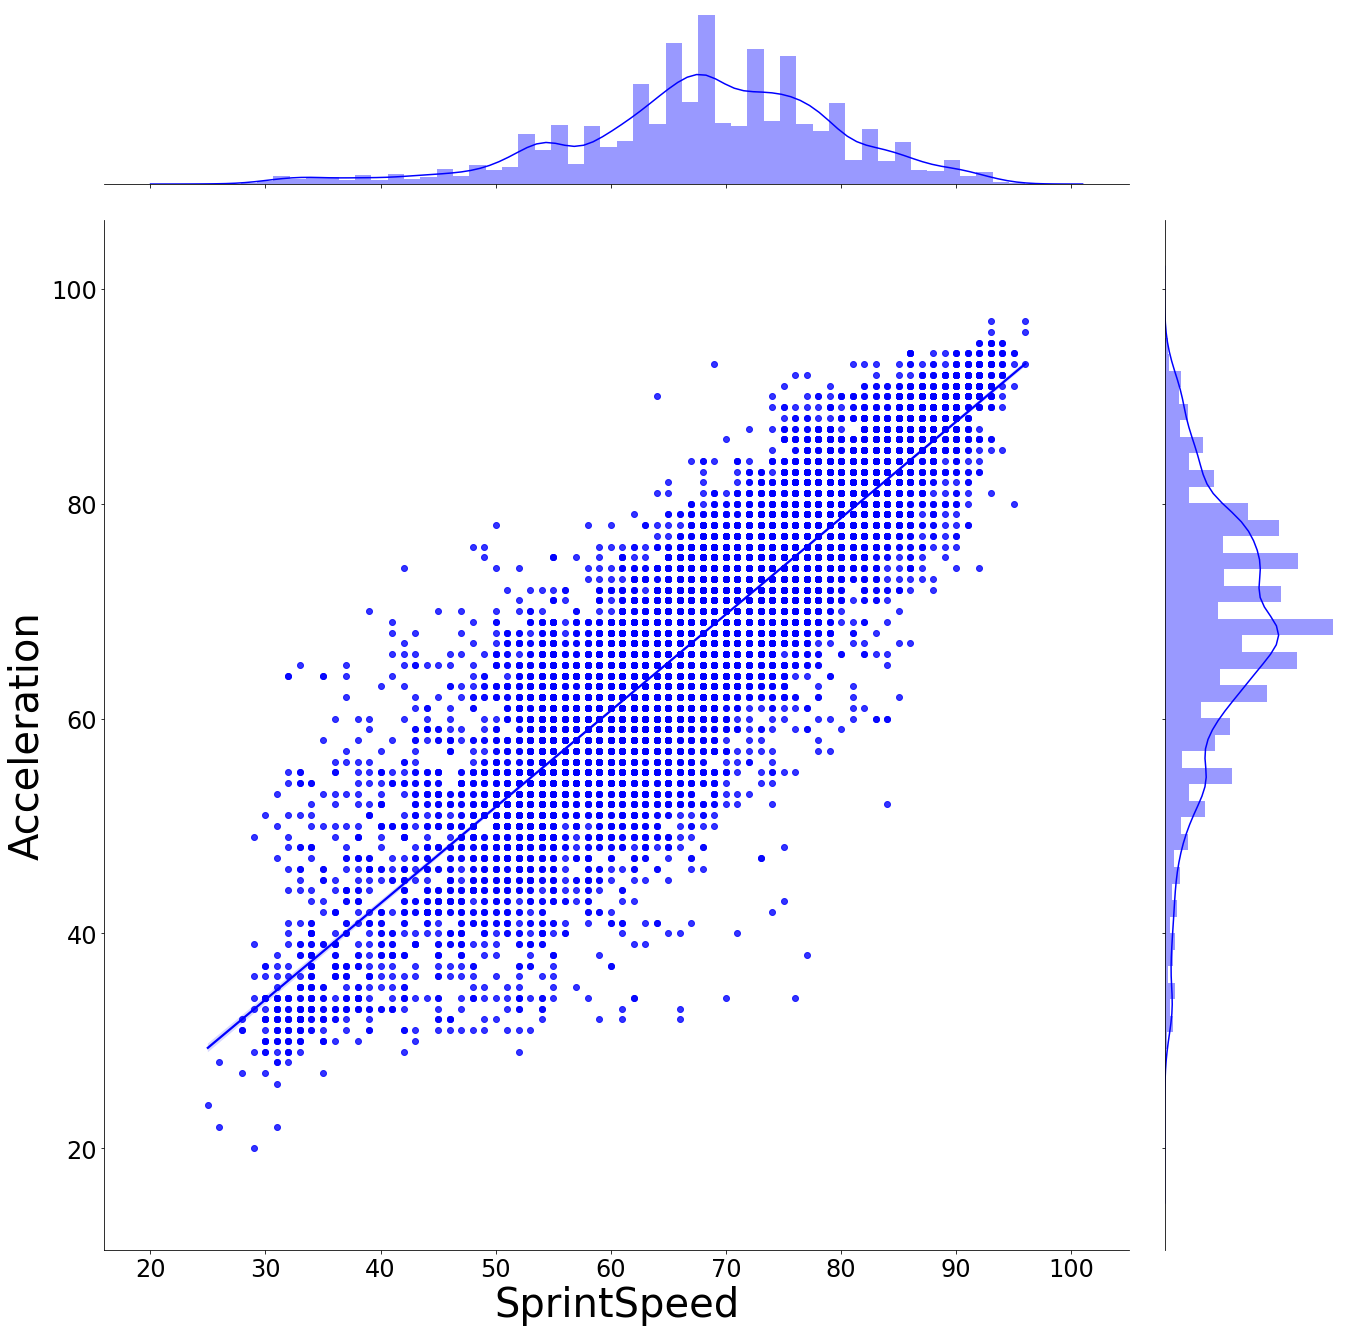

In [31]:
draw_jointplot(data, 'SprintSpeed', 'Acceleration', color = 'blue', kind = 'reg')

<Figure size 792x792 with 0 Axes>

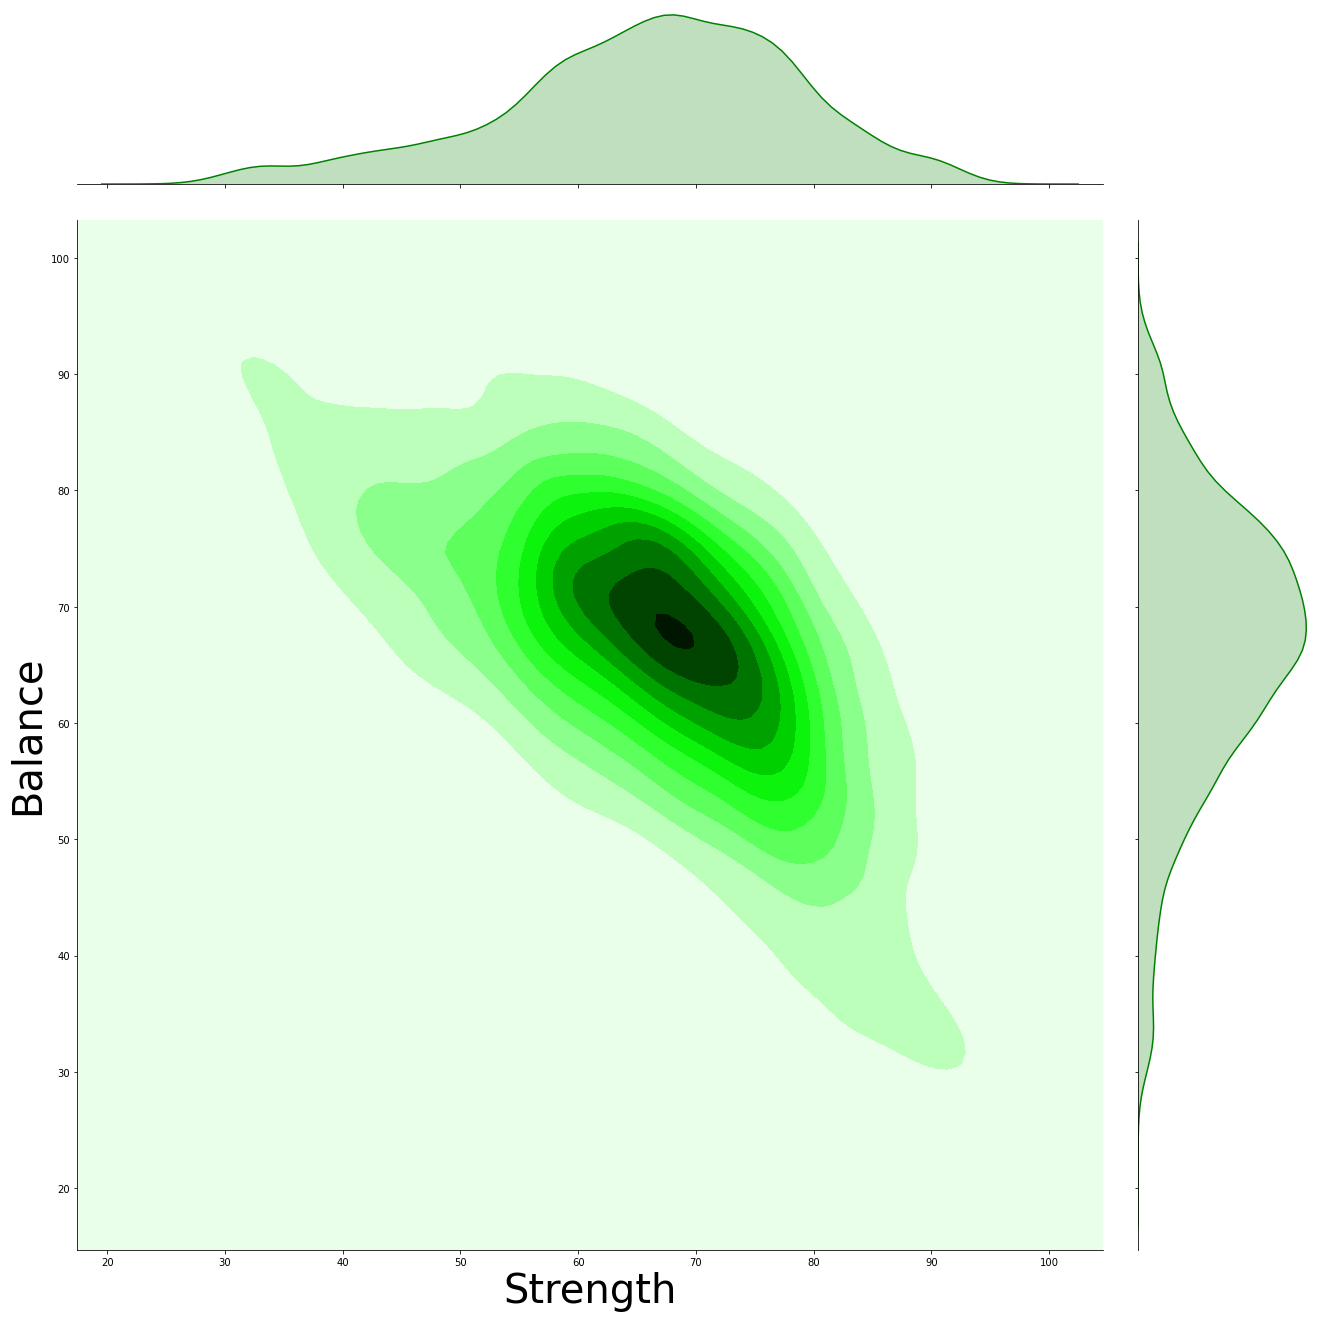

In [32]:
draw_jointplot(data, 'Strength', 'Balance', 18, 'green', 'kde')

#### Distribution

In [33]:
# Distribution of overall:
data['Overall'].value_counts().head(20)

66    1045
67    1008
64     976
65     931
68     912
63     876
69     856
70     807
62     745
71     699
72     681
61     617
60     552
73     538
74     483
59     449
75     447
58     358
76     339
57     336
Name: Overall, dtype: int64

In [34]:
print(data['Overall'].min())
print(data['Overall'].max(), "\n")
print(data['Age'].min())
print(data['Age'].max())

46
94 

16
41


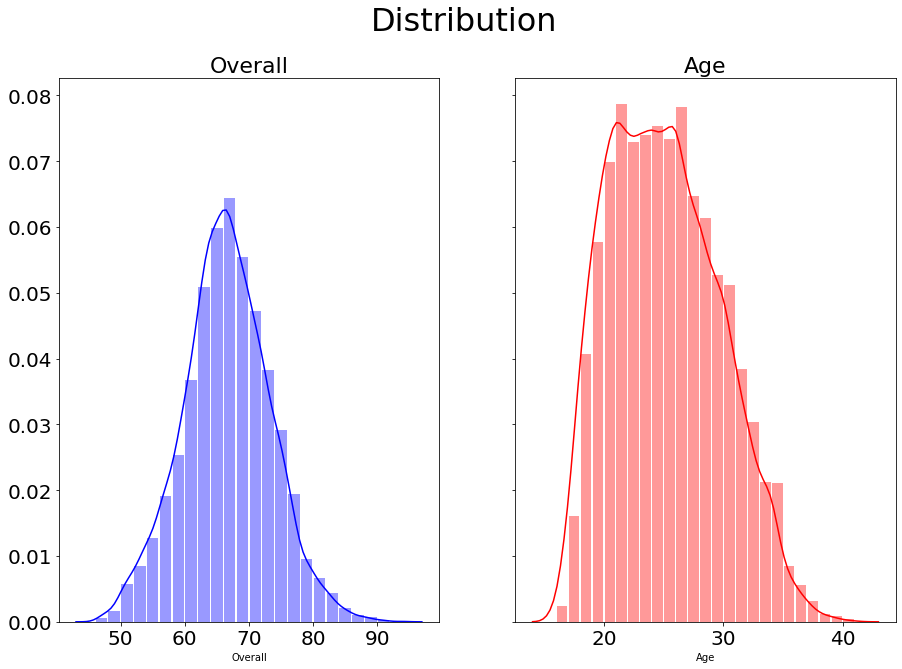

In [35]:
# Distribution plots:

f, ax = plt.subplots(1,2,figsize=((15,10)), sharey=True, sharex=False)
f.suptitle('Distribution', fontsize=32)
ax[0].set_title('Overall', fontsize=22)
ax[1].set_title('Age', fontsize=22)

sns.distplot(data['Overall'], 
             ax = ax[0], 
             color = 'blue', 
             bins = np.arange(46, 94, 2),
             hist_kws={"rwidth": 0.9})


sns.distplot(data['Age'],
             ax = ax[1],
             color = 'red',
             bins = np.arange(16, 42),
             hist_kws={"rwidth": 0.9})

ax[0].tick_params(labelsize = 20)
ax[1].tick_params(labelsize = 20)

plt.show()

In [36]:
# NORMAL DISTRIBUTION - GAUSS
stats_only.skew()

Crossing          -0.39
Finishing         -0.24
HeadingAccuracy   -0.13
ShortPassing      -0.58
Volleys            0.09
Dribbling         -0.81
Curve             -0.01
FKAccuracy         0.35
LongPassing       -0.49
BallControl       -0.58
Acceleration      -0.59
SprintSpeed       -0.59
Agility           -0.49
Reactions         -0.04
Balance           -0.52
ShotPower         -0.50
Jumping           -0.46
Stamina           -0.42
Strength          -0.51
LongShots         -0.36
Aggression        -0.35
Interceptions     -0.45
Positioning       -0.56
Vision            -0.30
Penalties          0.05
Composure         -0.07
Marking           -0.46
StandingTackle    -0.52
dtype: float64

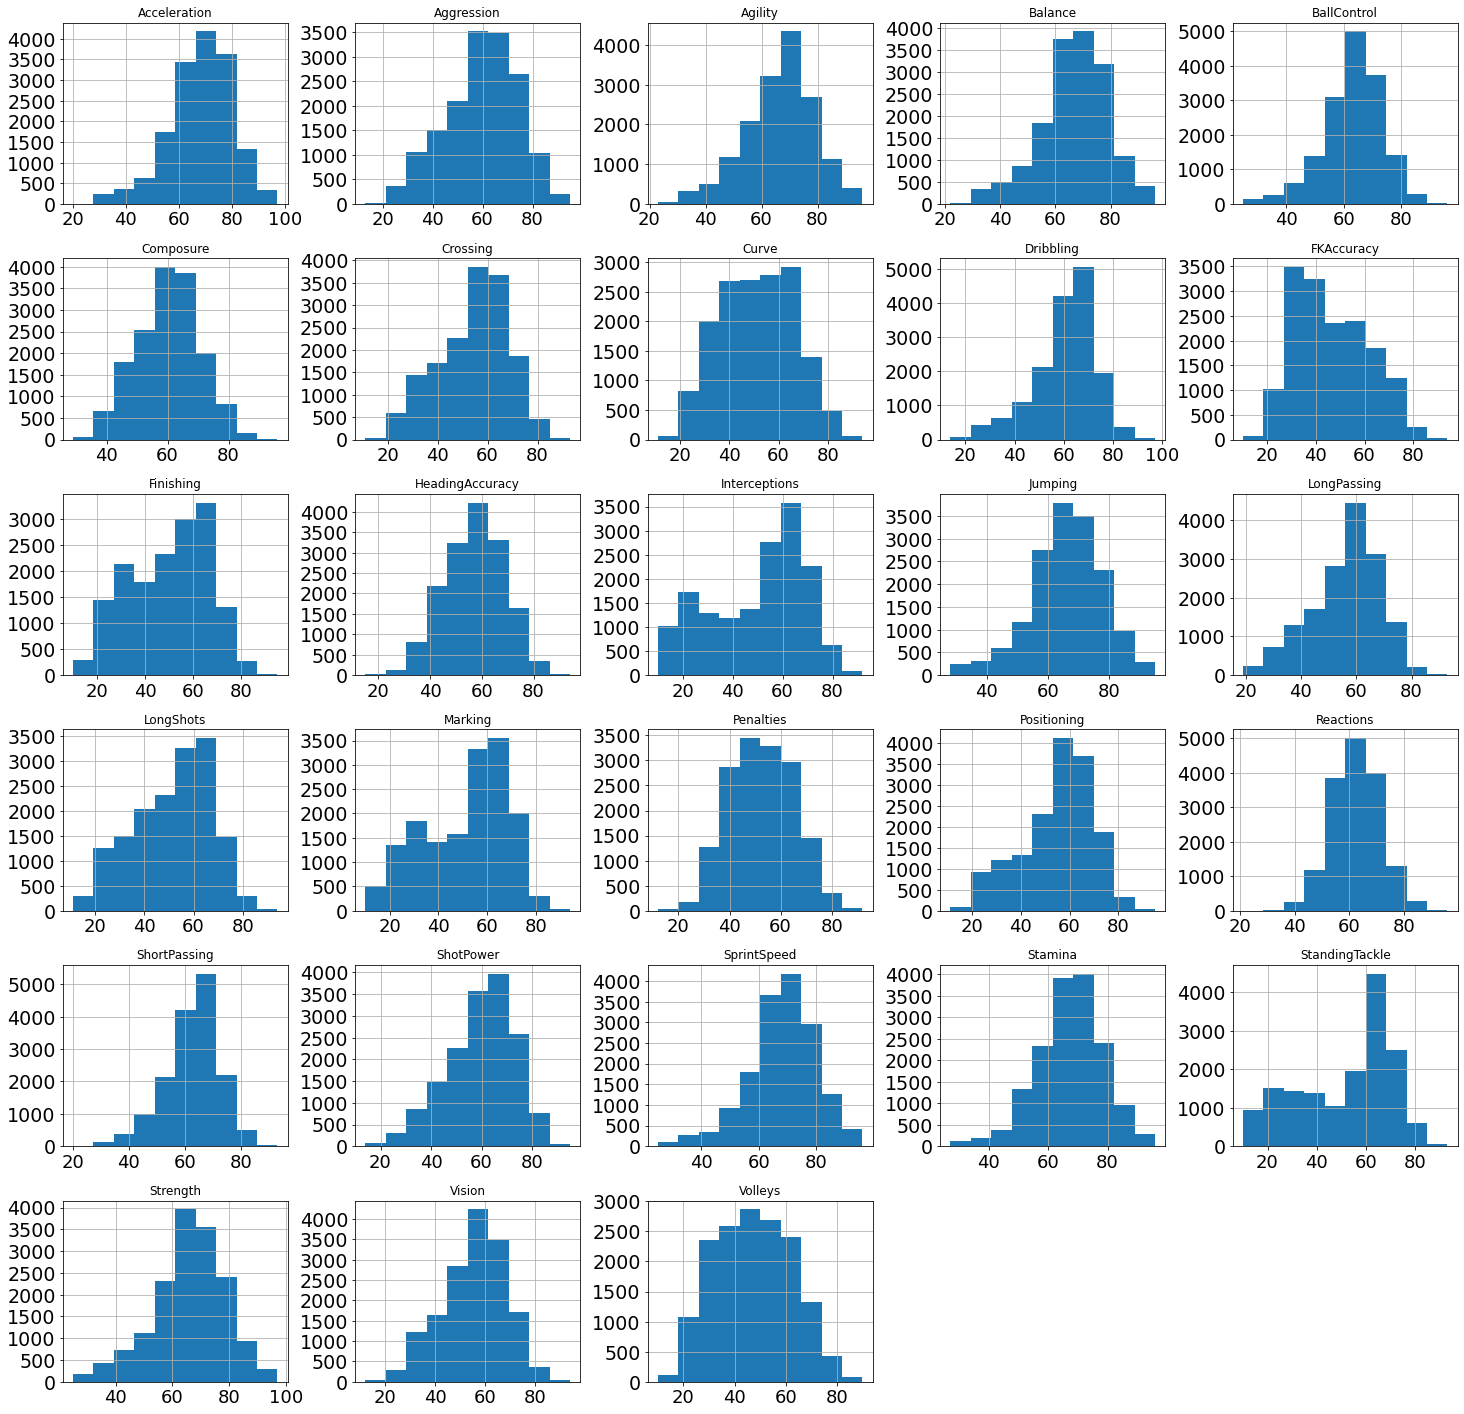

In [37]:
stats_only.hist(figsize=(25,25), xlabelsize = 18, ylabelsize = 19)
plt.show()

In [38]:
physical_only.skew()

Balance    -0.52
Jumping    -0.46
Agility    -0.49
Strength   -0.51
Stamina    -0.42
dtype: float64

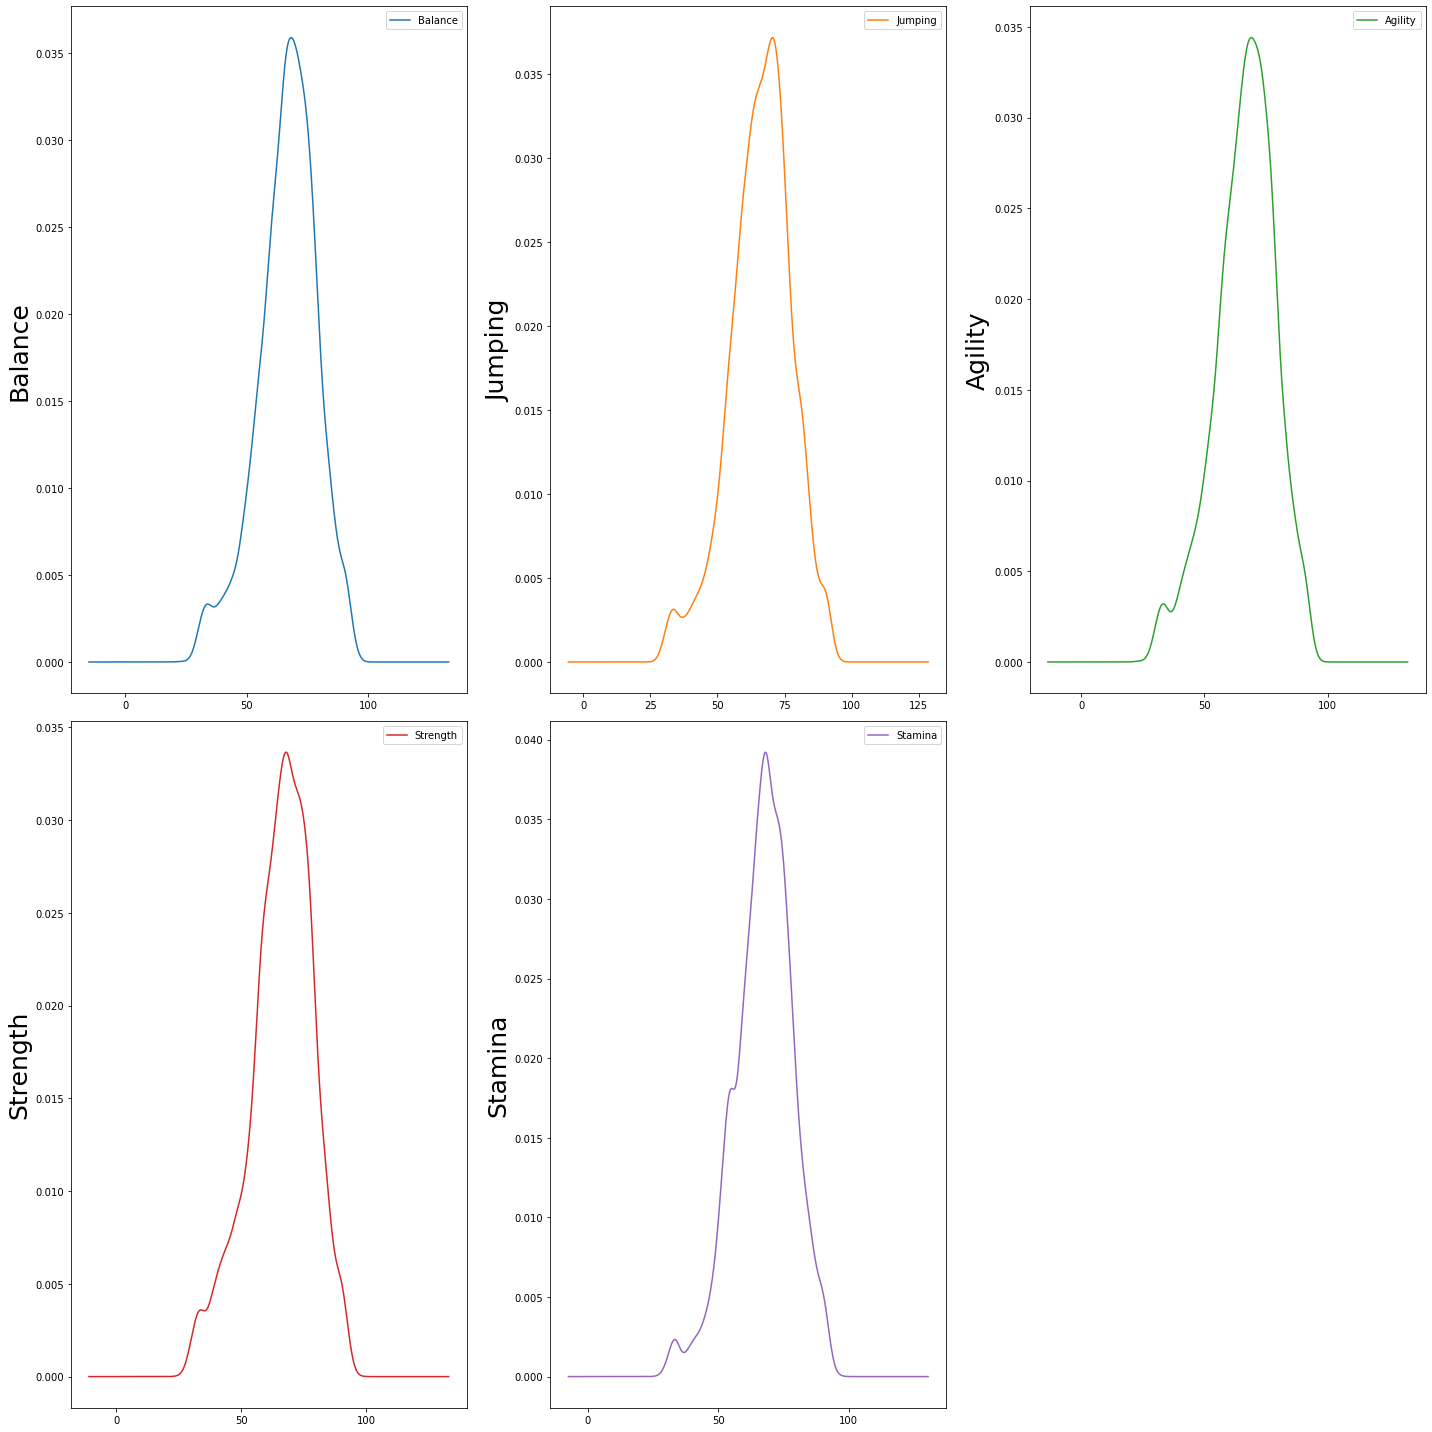

In [39]:
plot = physical_only.plot(kind='density', figsize=(20,20), subplots=True, layout=(2,3), sharex=False)

plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)

# Labels:
plot[0][0].set_ylabel(physical_only.columns[0], fontsize = 25)
plot[0][1].set_ylabel(physical_only.columns[1], fontsize = 25)
plot[0][2].set_ylabel(physical_only.columns[2], fontsize = 25)
plot[1][0].set_ylabel(physical_only.columns[3], fontsize = 25)
plot[1][1].set_ylabel(physical_only.columns[4], fontsize = 25)

plt.tight_layout(w_pad = 2.0)
plt.show()

In [40]:
# PREPARE DATA FOR 'BOXPLOT FOR 5 CHOSEN CLUBS'
chosen_clubs = ['FC Barcelona', 'Real Madrid', 'Chelsea', 'Napoli', 'SD Eibar', 'Legia Warszawa']
clubs_stats = data.loc[data.Club.isin(chosen_clubs)]
clubs_stats.reset_index(drop=True, inplace=True)
clubs_stats.head(20)


Name  Age Nationality  Overall  Potential Formation  \
0          L. Messi   31   Argentina       94         94       ATT   
1         E. Hazard   27     Belgium       91         91       ATT   
2         L. Modrić   32     Croatia       91         91       MID   
3         L. Suárez   31     Uruguay       91         91       ATT   
4      Sergio Ramos   32       Spain       91         91       DEF   
5          T. Kroos   28     Germany       90         90       MID   
6          N. Kanté   27      France       89         90       MID   
7   Sergio Busquets   29       Spain       89         89       MID   
8          Casemiro   26      Brazil       88         90       MID   
9        L. Insigne   27       Italy       88         88       MID   
10             Isco   26       Spain       88         91       MID   
11         Coutinho   26      Brazil       88         89       MID   
12          Marcelo   30      Brazil       88         88       DEF   
13          G. Bale   28       Wales       88         88       ATT   
14        S. Umtiti   24      France       87         92       DEF   
15     K. Koulibaly   27     Senegal       87         90       DEF   
16       Jordi Alba   29       Spain       87         87       DEF   
17       D. Mertens   31     Belgium       87         87       ATT   
18        M. Hamšík   30    Slovakia       87         87       MID   
19       I. Rakitić   30     Croatia       87         87       MID   

            Club    Value   Wage Preferred Foot  ...  LongShots  Aggression  \
0   FC Barcelona  €110.5M  €565K           Left  ...       94.0        48.0   
1        Chelsea     €93M  €340K          Right  ...       80.0        54.0   
2    Real Madrid     €67M  €420K          Right  ...       82.0        62.0   
3   FC Barcelona     €80M  €455K          Right  ...       85.0        87.0   
4    Real Madrid     €51M  €380K          Right  ...       59.0        88.0   
5    Real Madrid   €76.5M  €355K          Right  ...       92.0        60.0   
6        Chelsea     €63M  €225K          Right  ...       69.0        90.0   
7   FC Barcelona   €51.5M  €315K          Right  ...       54.0        85.0   
8    Real Madrid   €59.5M  €285K          Right  ...       79.0        87.0   
9         Napoli     €62M  €165K          Right  ...       84.0        34.0   
10   Real Madrid   €73.5M  €315K          Right  ...       87.0        58.0   
11  FC Barcelona   €69.5M  €340K          Right  ...       93.0        59.0   
12   Real Madrid     €43M  €285K           Left  ...       70.0        84.0   
13   Real Madrid     €60M  €355K           Left  ...       91.0        65.0   
14  FC Barcelona     €57M  €205K           Left  ...       74.0        81.0   
15        Napoli     €51M  €115K          Right  ...       15.0        87.0   
16  FC Barcelona     €38M  €250K           Left  ...       66.0        75.0   
17        Napoli     €45M  €135K          Right  ...       81.0        59.0   
18        Napoli   €46.5M  €125K          Right  ...       83.0        56.0   
19  FC Barcelona   €46.5M  €260K          Right  ...       90.0        67.0   

    Interceptions Positioning Vision  Penalties Composure Marking  \
0            22.0        94.0   94.0       75.0      96.0    33.0   
1            41.0        87.0   89.0       86.0      91.0    34.0   
2            83.0        79.0   92.0       82.0      84.0    60.0   
3            41.0        92.0   84.0       85.0      85.0    62.0   
4            90.0        60.0   63.0       75.0      82.0    87.0   
5            82.0        79.0   86.0       73.0      85.0    72.0   
6            92.0        71.0   79.0       54.0      85.0    90.0   
7            87.0        77.0   87.0       60.0      90.0    90.0   
8            87.0        69.0   77.0       66.0      84.0    88.0   
9            26.0        83.0   87.0       61.0      83.0    51.0   
10           64.0        78.0   89.0       76.0      86.0    60.0   
11           49.0        84.0   90.0       70.0      85.

In [41]:
# FUNCTION DRAWING BOXPLOT FOR GIVEN DATA
def draw_boxplot(data, x, y, figsize=(13,8), title='Boxplot'):
    f, ax = plt.subplots(figsize=figsize)
    sns.boxplot(data=data, 
            x=x, 
            y=y,
            linewidth=3)
    plt.title(title, fontsize=30)
    plt.xlabel(x, fontsize = 24)
    plt.ylabel(y, fontsize = 24)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)

plt.show()

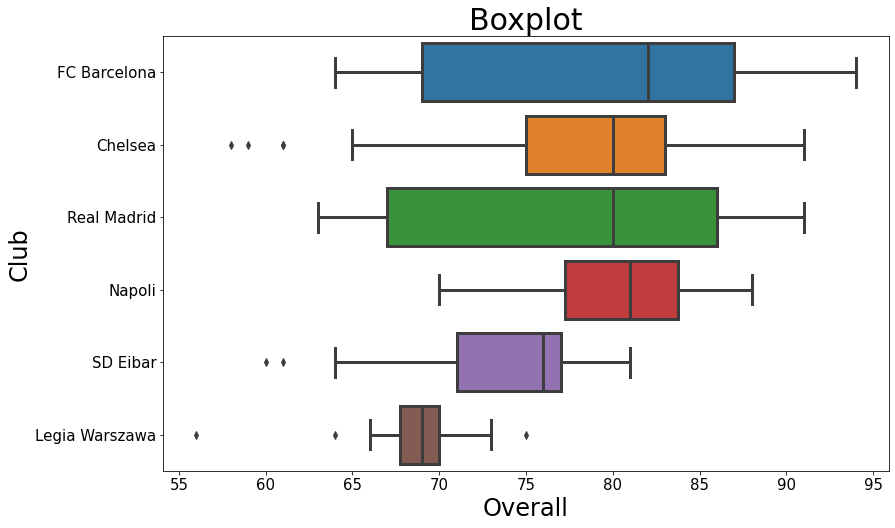

In [42]:
draw_boxplot(clubs_stats, 'Overall', 'Club')

In [43]:
laliga_clubs = ['Real Madrid', 
                'FC Barcelona', 
                'Atlético Madrid',
                'Valencia CF',
                'RC Celta',
                'Real Sociedad',
                'Villarreal CF',
                'Athletic Club de Bilbao',
                'Sevilla FC',
                'Levante UD',
                'Real Betis',
                'Girona FC',
                'Deportivo Alavés',
                'RCD Espanyol',
                'SD Eibar',
                'Getafe CF',
                'UD Las Palmas',
                'CD Leganés',
                'Rayo Vallecano',
                'Málaga CF']
laliga = data.loc[data.Club.isin(laliga_clubs)]
laliga.reset_index(drop=True, inplace=True)

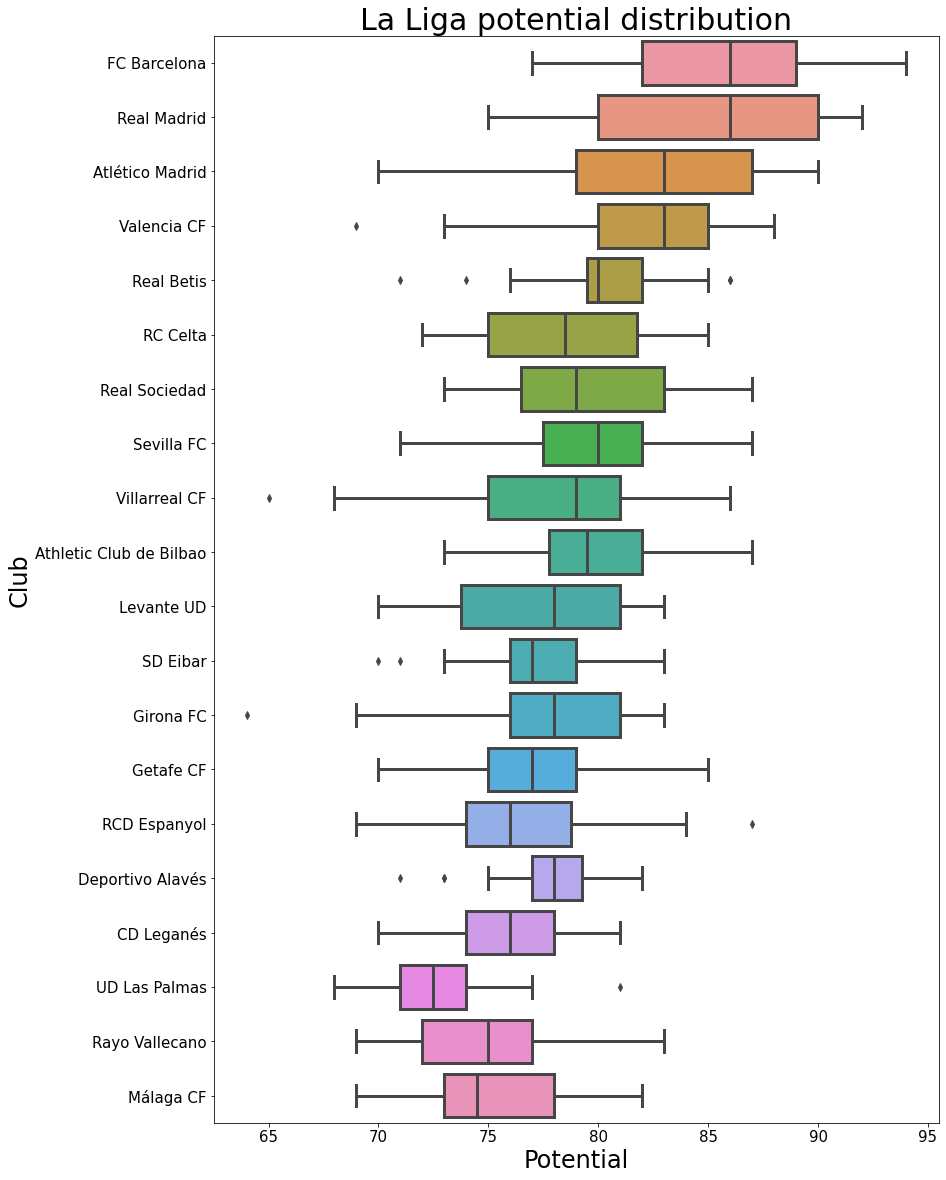

In [44]:
draw_boxplot(laliga, "Potential", "Club", figsize=(13,20), title='La Liga potential distribution')

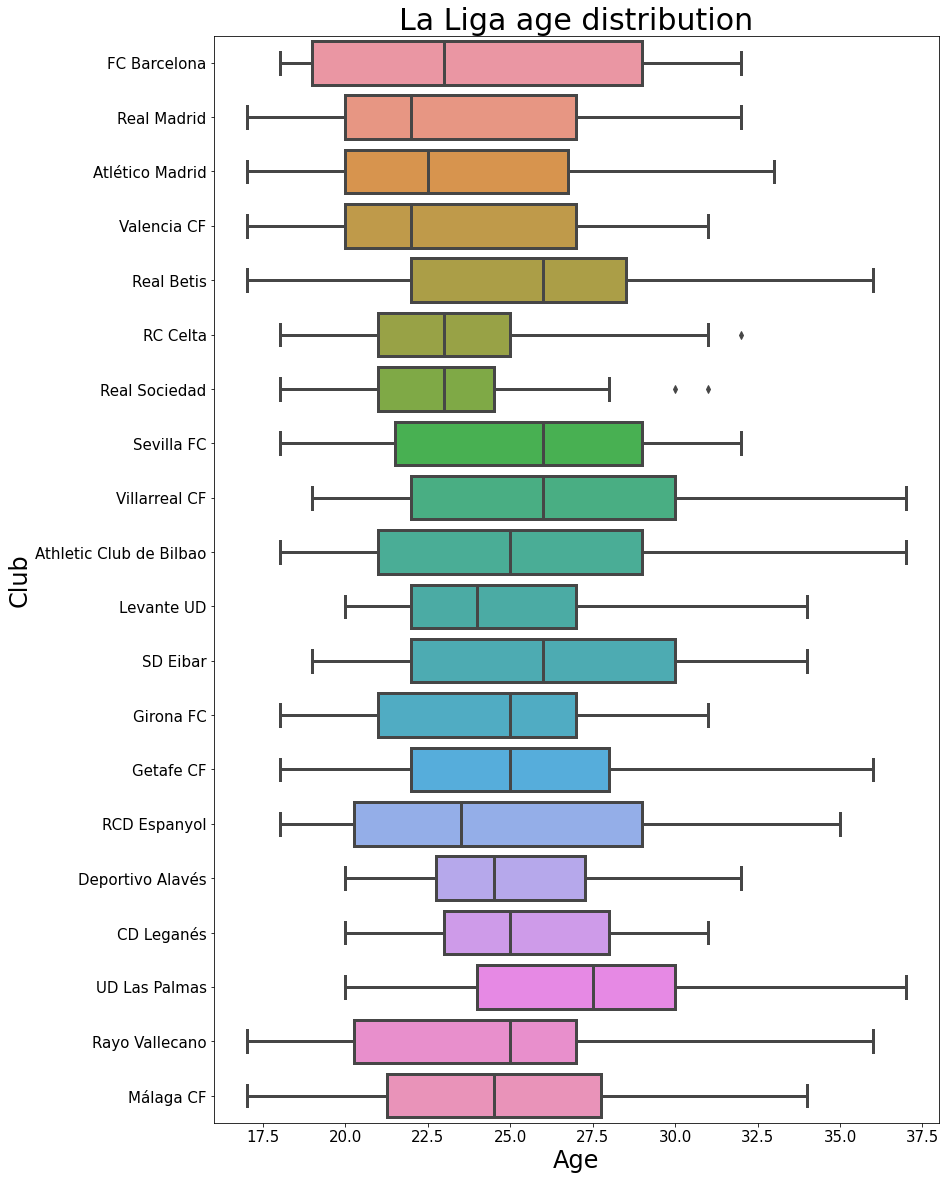

In [45]:
draw_boxplot(laliga, "Age", "Club", figsize=(13,20),title='La Liga age distribution')

### Regular expressions / filtering

In [46]:
data.loc[data['Nationality'].str.contains('Brazil|Portugal|Spain', regex=True)].head(20)

Name  Age Nationality  Overall  Potential Formation  \
1   Cristiano Ronaldo   33    Portugal       94         94       ATT   
2           Neymar Jr   26      Brazil       92         93       MID   
7        Sergio Ramos   32       Spain       91         91       DEF   
11        David Silva   32       Spain       90         90       MID   
16    Sergio Busquets   29       Spain       89         89       MID   
22           Casemiro   26      Brazil       88         90       MID   
25               Isco   26       Spain       88         91       MID   
27           Coutinho   26      Brazil       88         89       MID   
30            Marcelo   30      Brazil       88         88       DEF   
33       Thiago Silva   33      Brazil       88         88       DEF   
40         Jordi Alba   29       Spain       87         87       DEF   
45              Piqué   31       Spain       87         87       DEF   
47     Bernardo Silva   23    Portugal       86         91       MID   
51    Roberto Firmino   26      Brazil       86         87       MID   
54        Alex Sandro   27      Brazil       86         86       DEF   
55      Douglas Costa   27      Brazil       86         86       MID   
57             Thiago   27       Spain       86         86       MID   
59        Azpilicueta   28       Spain       86         86       DEF   
65        Fernandinho   33      Brazil       86         86       MID   
66            Iniesta   34       Spain       86         86       ATT   

                   Club    Value   Wage Preferred Foot  ...  LongShots  \
1              Juventus     €77M  €405K          Right  ...       93.0   
2   Paris Saint-Germain  €118.5M  €290K          Right  ...       82.0   
7           Real Madrid     €51M  €380K          Right  ...       59.0   
11      Manchester City     €60M  €285K           Left  ...       75.0   
16         FC Barcelona   €51.5M  €315K          Right  ...       54.0   
22          Real Madrid   €59.5M  €285K          Right  ...       79.0   
25          Real Madrid   €73.5M  €315K          Right  ...       87.0   
27         FC Barcelona   €69.5M  €340K          Right  ...       93.0   
30          Real Madrid     €43M  €285K           Left  ...       70.0   
33  Paris Saint-Germain     €24M  €165K          Right  ...       68.0   
40         FC Barcelona     €38M  €250K           Left  ...       66.0   
45         FC Barcelona     €34M  €240K          Right  ...       51.0   
47      Manchester City   €59.5M  €180K           Left  ...       72.0   
51            Liverpool     €53M  €195K          Right  ...       76.0   
54             Juventus   €36.5M  €160K           Left  ...       72.0   
55             Juventus   €46.5M  €175K           Left  ...       80.0   
57    FC Bayern München   €45.5M  €130K          Right  ...       79.0   
59              Chelsea     €35M  €175K          Right  ...       60.0   
65      Manchester City     €18M  €185K          Right  ...       78.0   
66          Vissel Kobe   €21.5M   €21K          Right  ...       71.0   

    Aggression  Interceptions Positioning Vision  Penalties Composure Marking  \
1         63.0           29.0        95.0   82.0       85.0      95.0    28.0   
2         56.0           36.0        89.0   87.0       81.0      94.0    27.0   
7         88.0           90.0        60.0   63.0       75.0      82.0    87.0   
11        57.0           50.0        89.0   92.0       75.0      93.0    59.0   
16        85.0           87.0        77.0   87.0       60.0      90.0    90.0   
22        87.0           87.0        69.0   77.0       66.0      84.0    88.0   
25        58.0           64.0        78.0   89.0       76.0      86.0    60.0   
27        59.0           49.0        84.0   90.0       70.0      85.0    55.0   
30        84.0           85.0        85.0   82.0       59.0      86.0    71.0   
33        76.0           89.0        59.0   72.0       60.0      81.0    88.0   
40        75.0           84.0        79.0   70.0       59.

In [47]:
data.loc[(data['Nationality'] == 'Poland') & data['Formation'].str.contains('DEF|ATT', regex=True)].head(10).reset_index(drop=True)

Name  Age Nationality  Overall  Potential Formation  \
0  R. Lewandowski   29      Poland       90         90       ATT   
1         K. Glik   30      Poland       83         83       DEF   
2     L. Piszczek   33      Poland       81         81       DEF   
3   L. Teodorczyk   27      Poland       76         77       ATT   
4  B. Bereszyński   25      Poland       74         77       DEF   
5       K. Piątek   23      Poland       74         80       ATT   
6     T. Kędziora   24      Poland       74         79       DEF   
7     M. Kamiński   26      Poland       73         75       DEF   
8    M. Stępiński   23      Poland       73         80       ATT   
9       M. Pazdan   30      Poland       73         73       DEF   

                 Club  Value   Wage Preferred Foot  ...  LongShots  \
0   FC Bayern München   €77M  €205K          Right  ...       84.0   
1           AS Monaco   €19M   €86K          Right  ...       20.0   
2   Borussia Dortmund    €7M   €57K          Right  ...       69.0   
3             Udinese    €9M   €28K          Right  ...       68.0   
4           Sampdoria    €6M   €25K          Right  ...       60.0   
5               Genoa    €8M   €15K          Right  ...       63.0   
6         Dynamo Kyiv  €6.5M    €1K          Right  ...       51.0   
7  Fortuna Düsseldorf    €4M   €24K           Left  ...       60.0   
8       Chievo Verona  €5.5M   €14K          Right  ...       64.0   
9      Legia Warszawa    €3M    €8K          Right  ...       49.0   

   Aggression  Interceptions Positioning Vision  Penalties Composure Marking  \
0        80.0           39.0        91.0   77.0       88.0      86.0    34.0   
1        86.0           83.0        24.0   23.0       39.0      79.0    82.0   
2        83.0           83.0        73.0   71.0       65.0      82.0    81.0   
3        77.0           24.0        80.0   65.0       65.0      74.0    37.0   
4        74.0           70.0        60.0   60.0       50.0      70.0    66.0   
5        33.0           31.0        78.0   52.0       69.0      69.0    33.0   
6        72.0           65.0        66.0   61.0       38.0      59.0    75.0   
7        65.0           73.0        59.0   56.0       34.0      58.0    76.0   
8        50.0           32.0        76.0   59.0       62.0      60.0    53.0   
9        83.0           75.0        45.0   64.0       31.0      65.0    69.0   

   StandingTackle  SlidingTackle  
0            42.0           19.0  
1            85.0           82.0  
2            82.0           79.0  
3            22.0           20.0  
4            75.0           72.0  
5            38.0           24.0  
6            76.0           75.0  
7            73.0           71.0  
8            18.0           17.0  
9            70.0           73.0  

[10 rows x 47 columns]

In [48]:
data.loc[data['Name'].str.contains('^B[a-z]*', flags=re.I, regex=True)]

Name  Age  Nationality  Overall  Potential Formation  \
47      Bernardo Silva   23     Portugal       86         91       MID   
91          B. Matuidi   31       France       85         85       MID   
102    Bruno Fernandes   23     Portugal       84         88       MID   
179            B. Dost   29  Netherlands       83         83       ATT   
236             Bartra   27        Spain       82         83       DEF   
...                ...  ...          ...      ...        ...       ...   
15824        B. Horton   17      England       50         67       DEF   
15842      B. Arapovic   19       Sweden       50         64       MID   
15856       B. Buckley   17      England       49         61       MID   
15860   B. Sass-Davies   18        Wales       49         70       DEF   
15923        B. Worman   16      England       47         67       ATT   

                   Club   Value   Wage Preferred Foot  ...  LongShots  \
47      Manchester City  €59.5M  €180K           Left  ...       72.0   
91             Juventus    €26M  €145K           Left  ...       70.0   
102         Sporting CP  €40.5M   €22K          Right  ...       88.0   
179         Sporting CP    €26M   €26K          Right  ...       72.0   
236          Real Betis    €21M   €32K          Right  ...       62.0   
...                 ...     ...    ...            ...  ...        ...   
15824  Doncaster Rovers    €50K    €1K           Left  ...       22.0   
15842         BK Häcken    €60K    €1K          Right  ...       34.0   
15856      Grimsby Town    €50K    €1K          Right  ...       38.0   
15860   Crewe Alexandra    €60K    €1K          Right  ...       16.0   
15923  Cambridge United    €60K    €1K          Right  ...       45.0   

       Aggression  Interceptions Positioning Vision  Penalties Composure  \
47           58.0           49.0        83.0   86.0       68.0      85.0   
91           86.0           86.0        72.0   76.0       56.0      82.0   
102          65.0           70.0        79.0   86.0       81.0      83.0   
179          70.0           39.0        89.0   68.0       88.0      81.0   
236          80.0           86.0        61.0   75.0       52.0      76.0   
...           ...            ...         ...    ...        ...       ...   
15824        52.0           51.0        41.0   37.0       32.0      33.0   
15842        56.0           38.0        49.0   44.0       39.0      40.0   
15856        40.0           36.0        41.0   55.0       35.0      49.0   
15860        49.0           51.0        27.0   33.0       35.0      47.0   
15923        32.0           15.0        48.0   43.0       55.0      41.0   

      Marking  StandingTackle  SlidingTackle  
47       49.0            44.0           35.0  
91       85.0            84.0           86.0  
102      63.0            66.0           53.0  
179      38.0            45.0           26.0  
236      77.0            83.0           80.0  
...       ...             ...            ...  
15824    49.0            54.0           53.0  
15842    33.0            44.0           43.0  
15856    30.0            40.0           40.0  
15860    43.0            51.0           47.0  
15923    32.0            13.0           11.0  

[576 rows x 47 columns]

### Conditional changes

In [49]:
data.loc[data['Formation'] == 'MID', 'Formation'] = 'Midfielder'
data.loc[data['Formation'] == 'DEF', 'Formation'] = 'Defender'
data.loc[data['Formation'] == 'ATT', 'Formation'] = 'Attacker'

In [50]:
data.head(20)

Name  Age Nationality  Overall  Potential   Formation  \
0            L. Messi   31   Argentina       94         94    Attacker   
1   Cristiano Ronaldo   33    Portugal       94         94    Attacker   
2           Neymar Jr   26      Brazil       92         93  Midfielder   
3        K. De Bruyne   27     Belgium       91         92  Midfielder   
4           E. Hazard   27     Belgium       91         91    Attacker   
5           L. Modrić   32     Croatia       91         91  Midfielder   
6           L. Suárez   31     Uruguay       91         91    Attacker   
7        Sergio Ramos   32       Spain       91         91    Defender   
8      R. Lewandowski   29      Poland       90         90    Attacker   
9            T. Kroos   28     Germany       90         90  Midfielder   
10           D. Godín   32     Uruguay       90         90    Defender   
11        David Silva   32       Spain       90         90  Midfielder   
12           N. Kanté   27      France       89         90  Midfielder   
13          P. Dybala   24   Argentina       89         94    Attacker   
14            H. Kane   24     England       89         91    Attacker   
15       A. Griezmann   27      France       89         90  Midfielder   
16    Sergio Busquets   29       Spain       89         89  Midfielder   
17          E. Cavani   31     Uruguay       89         89    Attacker   
18          S. Agüero   30   Argentina       89         89    Attacker   
19       G. Chiellini   33       Italy       89         89    Defender   

                   Club    Value   Wage Preferred Foot  ...  LongShots  \
0          FC Barcelona  €110.5M  €565K           Left  ...       94.0   
1              Juventus     €77M  €405K          Right  ...       93.0   
2   Paris Saint-Germain  €118.5M  €290K          Right  ...       82.0   
3       Manchester City    €102M  €355K          Right  ...       91.0   
4               Chelsea     €93M  €340K          Right  ...       80.0   
5           Real Madrid     €67M  €420K          Right  ...       82.0   
6          FC Barcelona     €80M  €455K          Right  ...       85.0   
7           Real Madrid     €51M  €380K          Right  ...       59.0   
8     FC Bayern München     €77M  €205K          Right  ...       84.0   
9           Real Madrid   €76.5M  €355K          Right  ...       92.0   
10      Atlético Madrid     €44M  €125K          Right  ...       43.0   
11      Manchester City     €60M  €285K           Left  ...       75.0   
12              Chelsea     €63M  €225K          Right  ...       69.0   
13             Juventus     €89M  €205K           Left  ...       88.0   
14    Tottenham Hotspur   €83.5M  €205K          Right  ...       85.0   
15      Atlético Madrid     €78M  €145K           Left  ...       82.0   
16         FC Barcelona   €51.5M  €315K          Right  ...       54.0   
17  Paris Saint-Germain     €60M  €200K          Right  ...       79.0   
18      Manchester City   €64.5M  €300K          Right  ...       83.0   
19             Juventus     €27M  €215K           Left  ...       49.0   

    Aggression  Interceptions Positioning Vision  Penalties Composure Marking  \
0         48.0           22.0        94.0   94.0       75.0      96.0    33.0   
1         63.0           29.0        95.0   82.0       85.0      95.0    28.0   
2         56.0           36.0        89.0   87.0       81.0      94.0    27.0   
3         76.0           61.0        87.0   94.0       79.0      88.0    68.0   
4         54.0           41.0        87.0   89.0       86.0      91.0    34.0   
5         62.0           83.0        79.0   92.0       82.0      84.0    60.0   
6         87.0           41.0        92.0   84.0       85.0      85.0    62.0   
7         88.0           90.0        60.0   63.0       75.0      82.0    87.0   
8         80.0           39.0        91.0   77.0       88.0      86.0    34.0   
9         60.0           82.0        79.0   86.0       73.0      85.0    72.0   
10        89.0  

In [22]:
data['Nationality'].unique()

array(['Argentina', 'Portugal', 'Brazil', 'Belgium', 'Croatia', 'Uruguay',
       'Spain', 'Poland', 'Germany', 'France', 'England', 'Italy',
       'Egypt', 'Colombia', 'Denmark', 'Gabon', 'Wales', 'Senegal',
       'Slovakia', 'Netherlands', 'Bosnia Herzegovina', 'Morocco',
       'Serbia', 'Algeria', 'Austria', 'Greece', 'Chile', 'Sweden',
       'Korea Republic', 'Guinea', 'Montenegro', 'Slovenia', 'Armenia',
       'Scotland', 'Ghana', 'Central African Rep.', 'DR Congo',
       'Ivory Coast', 'Russia', 'Ukraine', 'Iceland', 'Mexico', 'Jamaica',
       'Switzerland', 'Albania', 'Venezuela', 'Japan', 'Turkey',
       'Ecuador', 'Paraguay', 'Mali', 'Nigeria', 'Dominican Republic',
       'Israel', 'Czech Republic', 'Cameroon', 'Kenya',
       'Republic of Ireland', 'Romania', 'United States', 'Hungary',
       'Cape Verde', 'Norway', 'Peru', 'Togo', 'Syria', 'Zimbabwe',
       'Angola', 'Burkina Faso', 'Finland', 'Iran', 'Estonia',
       'Costa Rica', 'Tunisia', 'Equatorial Guinea',

In [24]:
data.columns

Index(['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Formation',
       'Club', 'Value', 'Wage', 'Preferred Foot', 'International Reputation',
       'Weak Foot', 'Skill Moves', 'Work Rate', 'Position', 'Jersey Number',
       'Height', 'Weight', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle'],
      dtype='object')